<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [123]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [124]:
df = pd.read_csv('../../data/breast-cancer-wisconsin-data.csv')

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [125]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [126]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [127]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [128]:
df['Unnamed: 32'].value_counts()

Series([], Name: count, dtype: int64)

In [129]:
df = df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [130]:
df.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [131]:
mapping = {'M': 1, 'B': 0}

df['diagnosis_encoded'] = df['diagnosis'].replace(mapping)

df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_encoded
194,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,1
253,8860702,M,17.300,17.08,113.00,928.2,0.10080,0.10410,0.126600,0.083530,0.1813,0.05613,1
506,91544001,B,12.220,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.021660,0.2124,0.06894,0
521,91762702,M,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.231000,0.147100,0.1991,0.06739,1
401,904647,B,11.930,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.017960,0.1601,0.05541,0
243,88411702,B,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,0.1773,0.05429,0
520,917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,0.2197,0.07696,0
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,0.06130,1
327,895299,B,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,0
269,8910720,B,10.710,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,0


In [132]:
df = df.drop(['diagnosis', 'id'], axis=1)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


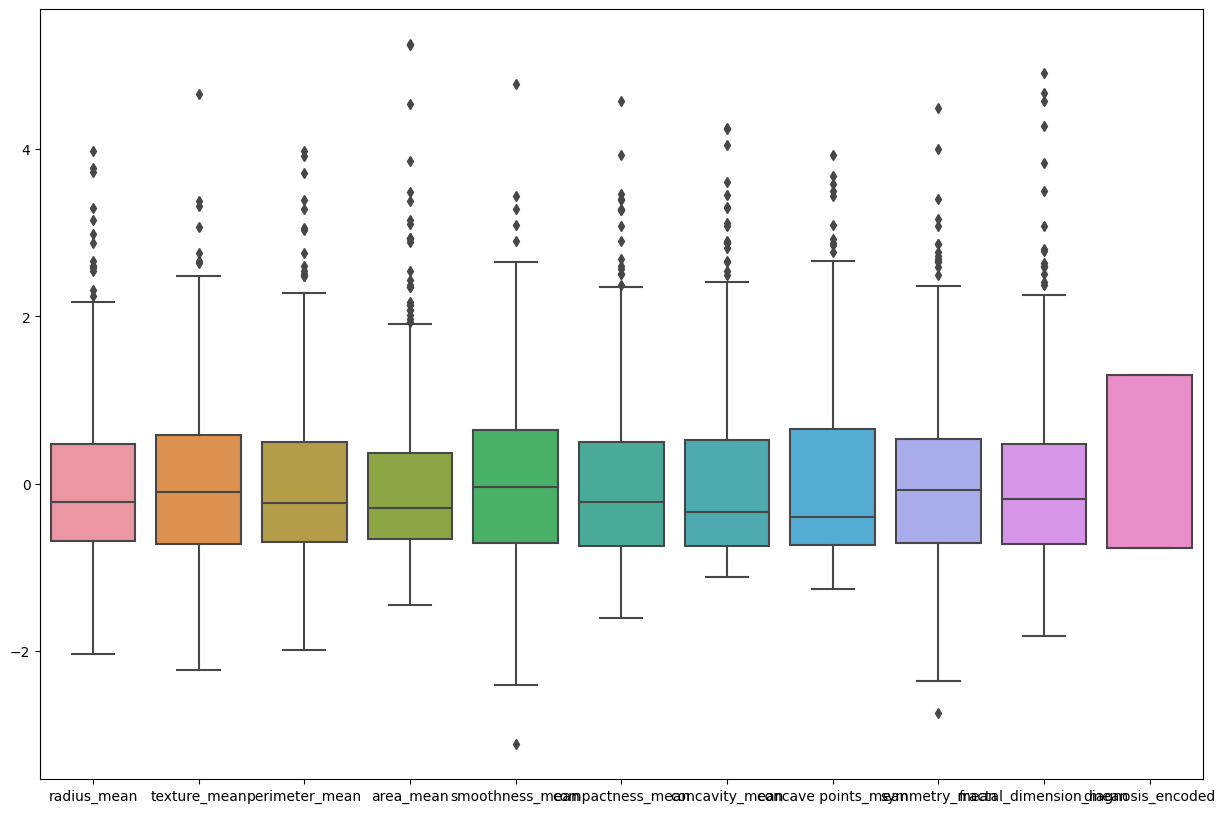

In [133]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
df_stand = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_stand)
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [134]:
# ANSWER
y = df['diagnosis_encoded']

y.value_counts()


diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

### 4. What is the baseline accuracy?

In [135]:
# ANSWER
#If I was simply going to assume everything was going to be the most frequent value (benign), then my baseline accuracy would equal the following:
(y == 0).sum()/(y).count()


0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [136]:
# ANSWER
X = df.drop(['diagnosis_encoded'], axis=1)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [137]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
classifier= KNeighborsClassifier(n_neighbors=1) 

# fit on the unstandardized data:
classifier.fit(X,y)


KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [138]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_pred = classifier.predict(X)
# store the predicted response values
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y, y_pred)  
cm

array([[357,   0],
       [  0, 212]], dtype=int64)

The above gives 100% accuracy, but it is predicting using the same data that the model was trained on, so we need to take it with a grain of salt.

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [139]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0) 
# STEP 2: train the model on the training set (using K=1)
classifier.fit(X_train,y_train)
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = classifier.predict(X_test)

cm= confusion_matrix(y_test, y_pred)  
print(cm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy = ', accuracy)

[[82  8]
 [ 8 45]]
Accuracy =  0.8881118881118881


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [140]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
classifier_many = KNeighborsClassifier(n_neighbors=y_train.count())

# Fit Train Data
classifier_many.fit(X_train, y_train)

# Print accuracy_score
y_pred = classifier_many.predict(X_test)

cm= confusion_matrix(y_test, y_pred)  
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ', accuracy)

[[90  0]
 [53  0]]
Accuracy =  0.6293706293706294


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

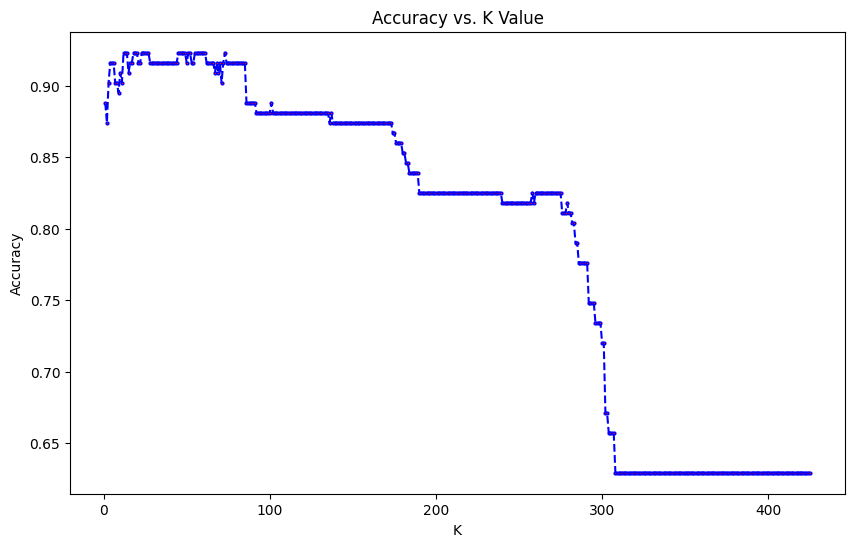

In [141]:
# ANSWER
# plot test accuracy by number of neighbors:
acc_array = []
for i in range(1,y_train.count()):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_array.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, y_train.count()), acc_array, color='blue', linestyle='dashed', marker='.', markerfacecolor='red', markersize=4)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


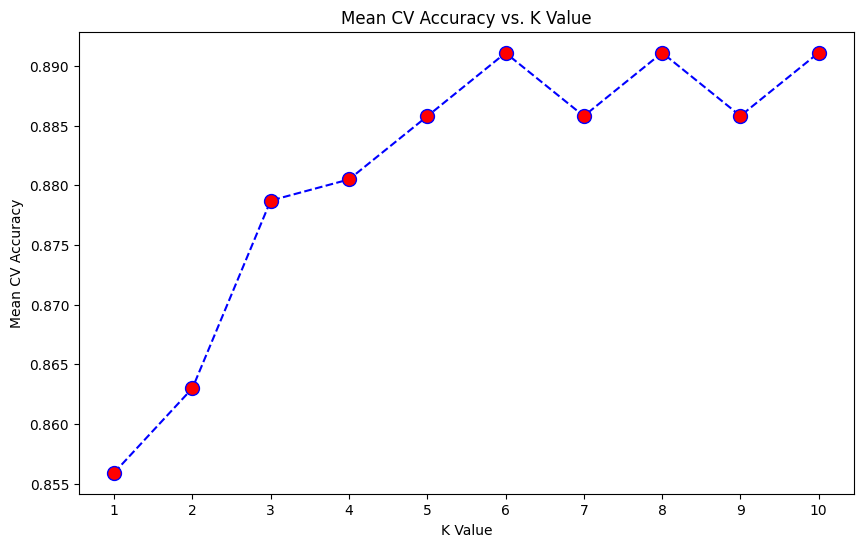

In [142]:
# ANSWER
from sklearn.model_selection import cross_val_score

mean_accuracy_scores = []


for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_scores = cross_val_score(knn, X, y, cv=5)
    
    mean_accuracy_scores.append(np.mean(cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), mean_accuracy_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Mean CV Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean CV Accuracy')
plt.xticks(range(1,11))  # This ensures only your K values are marked on the x-axis
plt.show()


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [143]:
# ANSWER
# Standarize X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

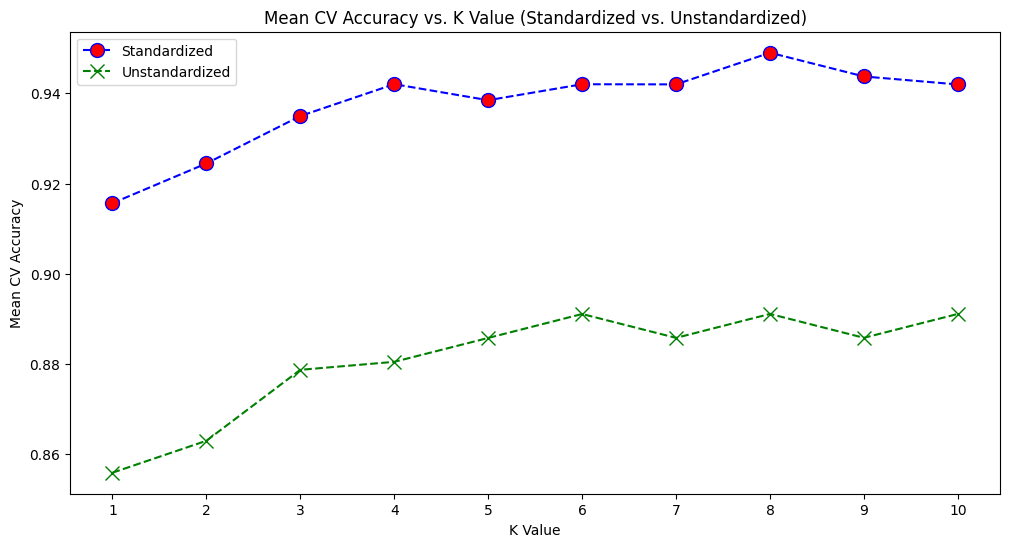

In [144]:
# ANSWER
# plot test accuracy by number of neighbors:
mean_accuracy_standardized = []
mean_accuracy_unstandardized = []


for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Standardized data
    cv_scores_standardized = cross_val_score(knn, X_scaled, y, cv=5)
    mean_accuracy_standardized.append(np.mean(cv_scores_standardized))

    # Unstandardized data
    cv_scores_unstandardized = cross_val_score(knn, X, y, cv=5)
    mean_accuracy_unstandardized.append(np.mean(cv_scores_unstandardized))


plt.figure(figsize=(12, 6))

plt.plot(range(1,11), mean_accuracy_standardized, label='Standardized', color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,11), mean_accuracy_unstandardized, label='Unstandardized', color='green', linestyle='dashed', marker='x', markerfacecolor='yellow', markersize=10)

plt.title('Mean CV Accuracy vs. K Value (Standardized vs. Unstandardized)')
plt.xlabel('K Value')
plt.ylabel('Mean CV Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.show()

The standardised data returns a significantly better result by removing variability in values between different features before fitting the model

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



